In [1]:
!pip install findspark


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

24/02/23 12:34:15 WARN Utils: Your hostname, tejasshinde-Nitro-AN515-55 resolves to a loopback address: 127.0.1.1; using 192.168.1.155 instead (on interface wlp0s20f3)
24/02/23 12:34:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/23 12:34:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/23 12:34:17 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Load Clean Dataset

In [4]:
data_path = "clean_purchase.csv"
df= spark.read.csv(data_path, header=True, inferSchema=True)

In [5]:
df.show()

+-------------------+-------------------+-------------------+-----------+------+-------------+-------------+-------------+--------------------+--------+------------------+-------+---------+--------+-------------+----------+----------+-------------------+-----------------+
|            user_id|           order_id|        category_id|      brand| price|        cat_1|        cat_2|        cat_3|max_purchase_by_user|class_id|    class_category|recency|frequency|monetary|customer_type|cust_value|      Date|               Time|         spending|
+-------------------+-------------------+-------------------+-----------+------+-------------+-------------+-------------+--------------------+--------+------------------+-------+---------+--------+-------------+----------+----------+-------------------+-----------------+
|1515915625440051468|2348787268686184498|2268105402673529732|    rowenta| 25.44|miscellaneous|miscellaneous|miscellaneous|              403.45|       2|Lower middle class|     42|  

# Plot the graph of No. of users belong to each class

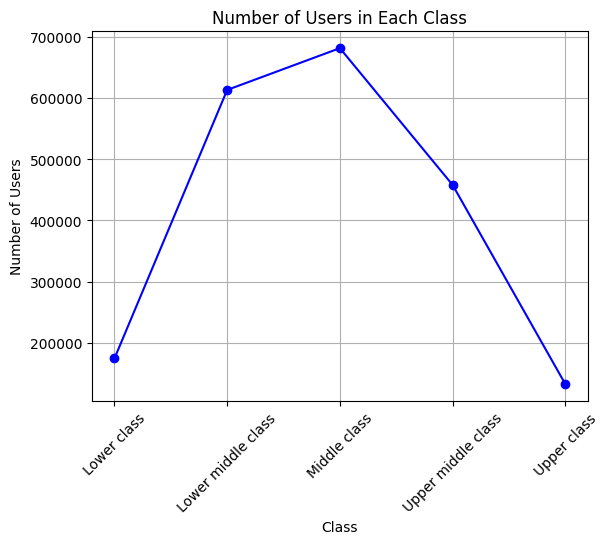

In [6]:
import matplotlib.pyplot as plt

# Group the DataFrame by Class and count the number of users in each class
class_counts = df.groupBy("class_id").count().orderBy("class_id").collect()

class_mapping = {
    5: "Upper class",
    4: "Upper middle class",
    3: "Middle class",
    2: "Lower middle class",
    1: "Lower class"
}

# Extract class names and corresponding user counts
classes = [class_mapping[row["class_id"]] for row in class_counts]
user_counts = [row["count"] for row in class_counts]

plt.plot(classes, user_counts, marker='o', color='blue')
plt.xlabel('Class')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Plot the graph of Average Spending for Each Class

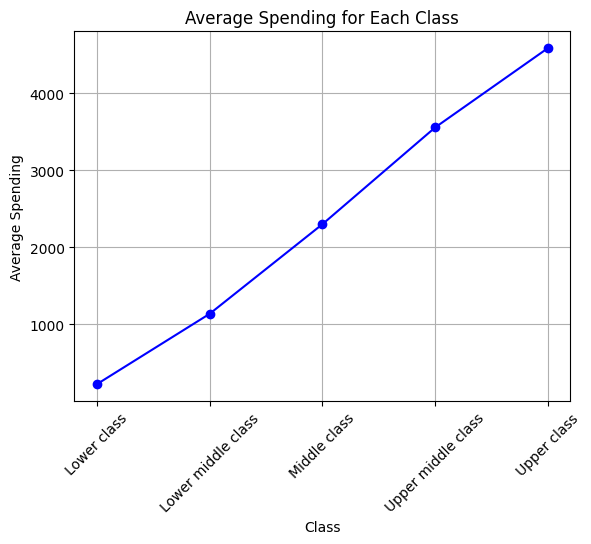

In [7]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Group the DataFrame by Class_value and calculate the average spending for each class
average_spending = df.groupBy("class_id").agg(F.avg("spending").alias("avg_spending")).orderBy("class_id")

class_mapping = {
    5: "Upper class",
    4: "Upper middle class",
    3: "Middle class",
    2: "Lower middle class",
    1: "Lower class"
}

classes = [class_mapping[row["class_id"]] for row in average_spending.collect()]
avg_spending = [row["avg_spending"] for row in average_spending.collect()]

plt.plot(classes, avg_spending, marker='o', color='blue')
plt.xlabel('Class')
plt.ylabel('Average Spending')
plt.title('Average Spending for Each Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sale over the Year

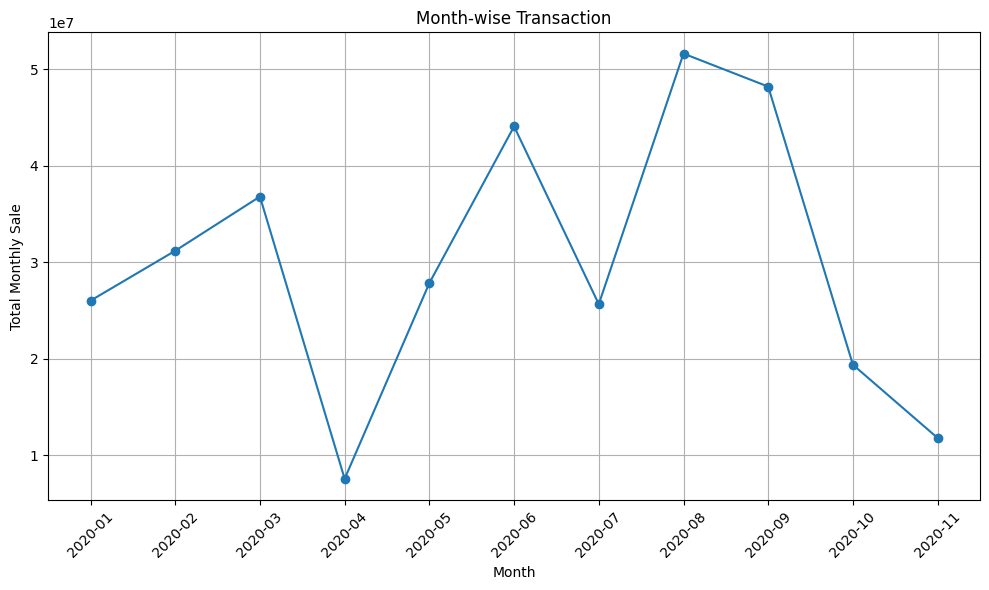

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, to_date
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Monthly Analysis").getOrCreate()

# Calculate sum of price per year-month
user_purchase_month_GMV = df.withColumn("Date", to_date(col("Date")).substr(1, 7)).groupBy("Date").agg(sum("price").alias("GMV")).orderBy("Date")

# Convert PySpark DataFrame to Pandas DataFrame for plotting
user_purchase_month_GMV_pd = user_purchase_month_GMV.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(user_purchase_month_GMV_pd["Date"], user_purchase_month_GMV_pd["GMV"], marker='o', linestyle='-')
plt.title("Month-wise Transaction")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sale")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


